In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Data
file_path = "web_traffic.csv"
data = pd.read_csv(file_path)

In [57]:
#Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [58]:
#Check for missing values
print(data.isnull().sum())

Timestamp       0
TrafficCount    0
dtype: int64


In [59]:
#Handle Missing Values (Example: Filling missing TrafficCount with the median)
if data['TrafficCount'].isnull().any():
    data['TrafficCount'].fillna(data['TrafficCount'].median(), inplace=True)

In [60]:
#Check and remove duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()

Number of duplicate rows: 0


In [61]:
#Extract time-based features
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Weekday'] = data['Timestamp'].dt.day_name()

In [62]:
# Summary statistics
print(data['TrafficCount'].describe())

count     2793.000000
mean      8591.321160
std      11478.605594
min         22.000000
25%        713.000000
50%       2418.000000
75%      14356.000000
max      71925.000000
Name: TrafficCount, dtype: float64


In [63]:
# setting by day of the week
weekday_data = data.groupby('Weekday')['TrafficCount'].mean().reset_index()
weekday_data['Weekday'] = weekday_data['Weekday'].replace({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
print("Average Traffic by Day of the Week:\n", weekday_data)

Average Traffic by Day of the Week:
      Weekday  TrafficCount
0     Friday  10866.161765
1     Monday  12449.476923
2   Saturday   1116.783251
3     Sunday   1056.746770
4   Thursday  11164.639706
5    Tuesday  11839.284974
6  Wednesday  11567.053922


In [64]:
#Aggregate data 
hourly_data = data.groupby('Hour')['TrafficCount'].mean().reset_index()
print("Hourly Average Traffic:\n", hourly_data)

Hourly Average Traffic:
     Hour  TrafficCount
0      0   1007.671756
1      1    682.405172
2      2    485.379310
3      3    317.353448
4      4    388.370690
5      5    715.327586
6      6   1102.491379
7      7   2744.025862
8      8   7178.681034
9      9  14065.051724
10    10  21475.810345
11    11  23626.521368
12    12  18522.598291
13    13  18343.956897
14    14  18626.068966
15    15  16741.482759
16    16  15162.060345
17    17  12893.146552
18    18  10603.373913
19    19   7496.060870
20    20   5343.464912
21    21   4500.640351
22    22   3031.626087
23    23   1677.400000


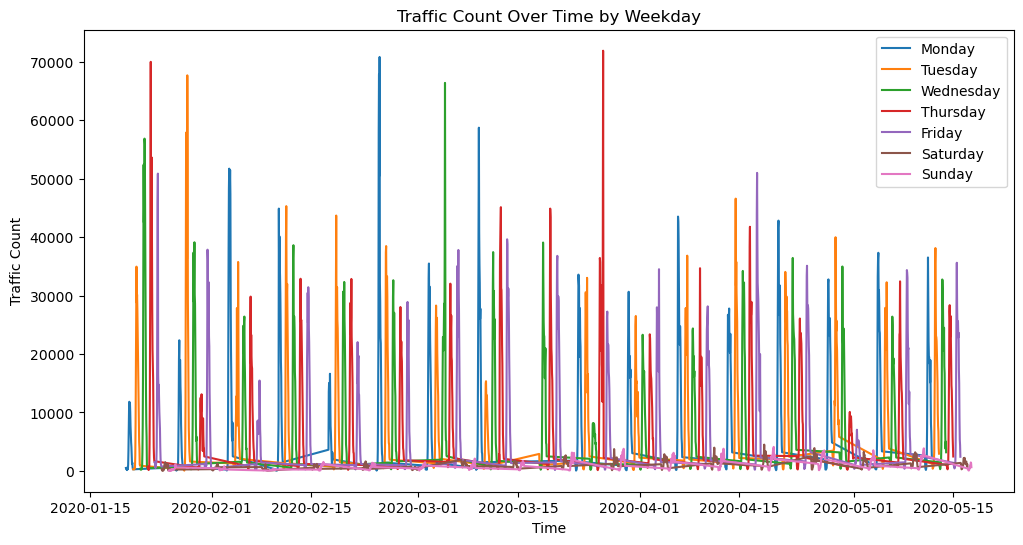

In [65]:
# Line plot: Traffic over time
plt.figure(figsize=(12, 6))
for day in data['Weekday'].unique():
    subset = data[data['Weekday'] == day]
    plt.plot(subset['Timestamp'], subset['TrafficCount'], label=day)
plt.title("Traffic Count Over Time by Weekday")
plt.xlabel("Time")
plt.ylabel("Traffic Count")
plt.legend()
plt.show()

**The line plot hows the overall web traffic trend over time.**

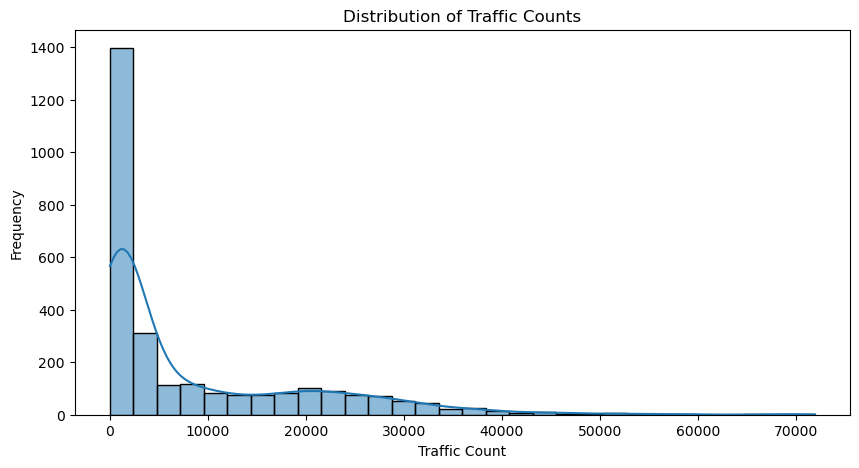

In [67]:
# Histogram: Distribution of traffic counts
plt.figure(figsize=(10, 5))
sns.histplot(data['TrafficCount'], bins=30, kde=True)
plt.title("Distribution of Traffic Counts")
plt.xlabel("Traffic Count")
plt.ylabel("Frequency")
plt.show()

**The histogram displays the distribution of TrafficCount, identifying skewness and potential outliers.**

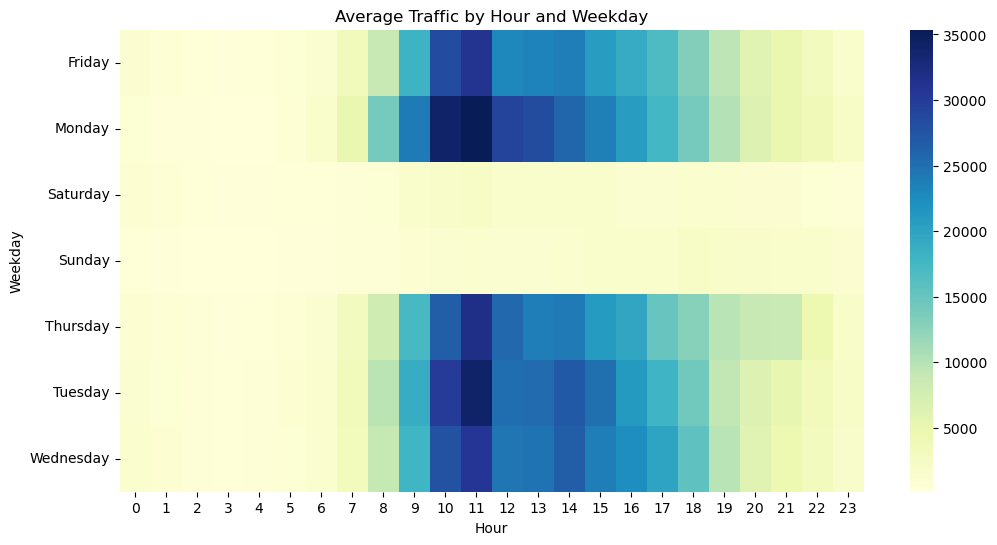

In [92]:
# Heatmap: Hourly traffic by weekday
heatmap_data = data.pivot_table(index='Weekday', columns='Hour', values='TrafficCount', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Average Traffic by Hour and Weekday")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.show()

**The heatmap (Hour vs. Weekday) illustrates how average traffic varies by hour and day of the week.**

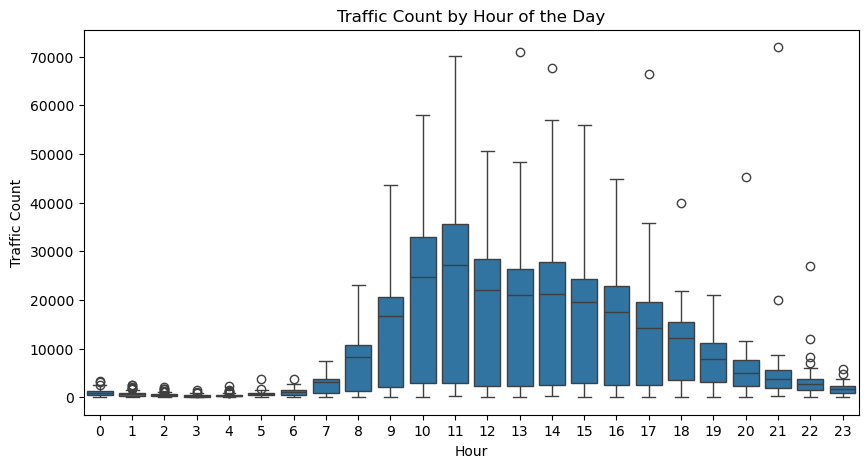

In [71]:
# Box plot: Hourly traffic distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hour', y='TrafficCount', data=data)
plt.title("Traffic Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Traffic Count")
plt.show()

**The Boxplot by hour shows variability and median traffic at each hour**